<a href="https://colab.research.google.com/github/icuz/PyColorizer/blob/main/colorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/jantic/DeOldify.git DeOldify

Cloning into 'DeOldify'...
remote: Enumerating objects: 2615, done.
remote: Counting objects: 100% (269/269), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 2615 (delta 91), reused 204 (delta 71), pack-reused 2346 (from 1)
Receiving objects: 100% (2615/2615), 69.71 MiB | 26.11 MiB/s, done.
Resolving deltas: 100% (1174/1174), done.


In [2]:
cd DeOldify

/content/DeOldify


In [3]:
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

GPU not available.


In [7]:
!pip install -r requirements-colab.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.4/631.4 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.9 MB/s eta 0:00:00
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654003 sha256=3690535237aa3eecdd59fd85348666cd

In [4]:
import fastai
from deoldify.visualize import *

torch.backends.cudnn.benchmark = True

In [5]:
!mkdir 'models'
!wget https://www.dropbox.com/s/axsd2g85uyixaho/ColorizeStable_gen.pth?dl=0 -O ./models/ColorizeStable_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2024-09-02 05:52:45--  https://www.dropbox.com/s/axsd2g85uyixaho/ColorizeStable_gen.pth?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/lqpj4methnbmgjd9wlqto/ColorizeStable_gen.pth?rlkey=sj7d54400lq8898wf3s2higco&dl=0 [following]
--2024-09-02 05:52:45--  https://www.dropbox.com/scl/fi/lqpj4methnbmgjd9wlqto/ColorizeStable_gen.pth?rlkey=sj7d54400lq8898wf3s2higco&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4751c038931e6b357b6d4e188c.dl.dropboxusercontent.com/cd/0/inline/CZzeP0Py8llhKyaRebXhrZ3_fypA8KS6AdtP2RdApPF_xZOdR6vpPQeUTytiI8AeDMPNvD0BN705GLPGp52qEOb3Mt0XFesZbWR_gBItD--oMfc-Gaf_C5xILGy2PZqgoALhLrBYaJ-pzn2o2L3q1Azr/file# [following]
--2

In [6]:
colorizer = get_image_colorizer(artistic=False)

/content/DeOldify/fastai/data_block.py:451: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/content/DeOldify/fastai/data_block.py:453: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  warn("""Your validation set is empty. If this is by design, use `split_none()`
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  wa

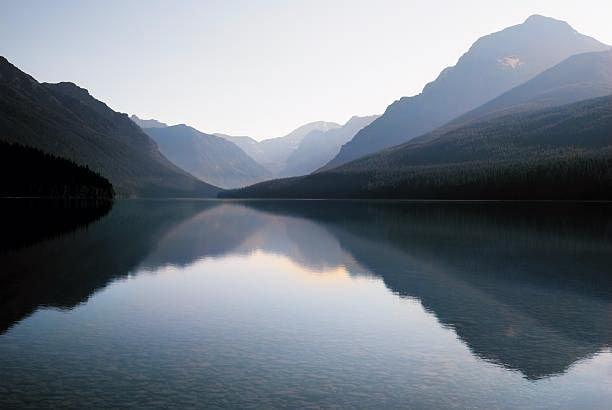

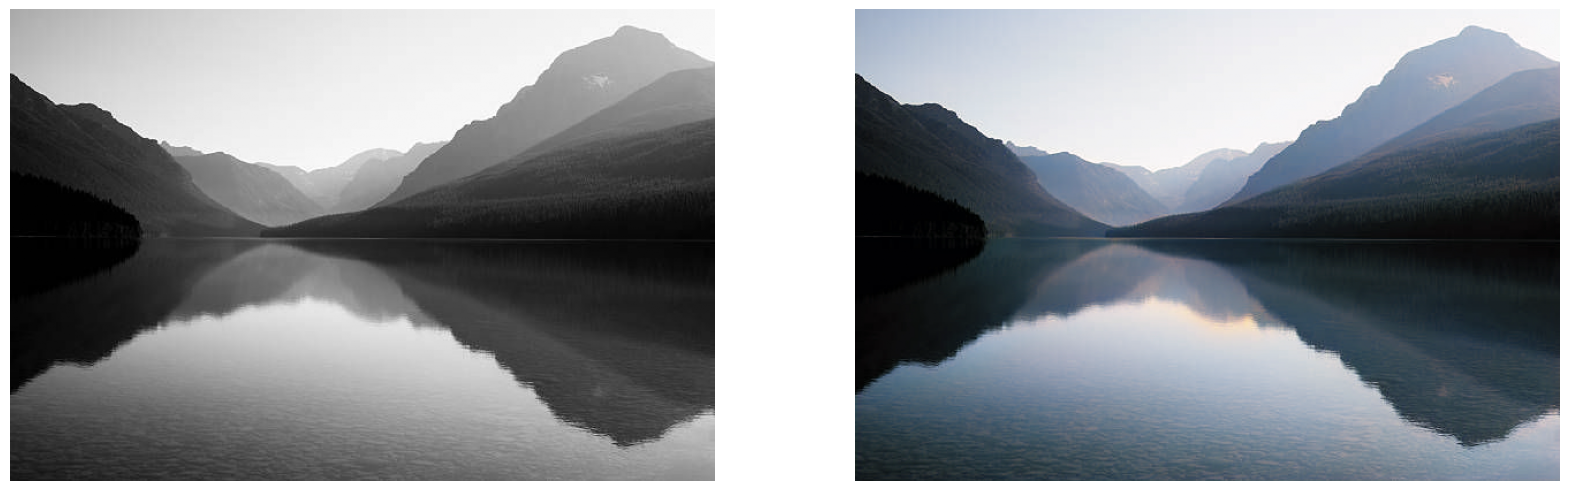

In [6]:
source_url = 'https://imgs.search.brave.com/qHUIqqpQvT612FqnGa6YzfCD9_qO7KF6784nn8s2Q4c/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9tZWRp/YS5pc3RvY2twaG90/by5jb20vaWQvMTU1/MTcwMzQzL3Bob3Rv/L2JsYWNrLWFuZC13/aGl0ZS1waG90by1v/Zi1ib3dtYW4tbGFr/ZS5qcGc_cz02MTJ4/NjEyJnc9MCZrPTIw/JmM9cTUxSmg5R3VG/czJ4MjRhYVB0WU45/T096RmlUcHEyVElr/RnlVY3JHejRYVT0' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermark = False # @param {type:"boolean"}
if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermark)
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')

In [ ]:
for i in range(10,40,2):
    colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

In [13]:
import gradio as gr
from deoldify.visualize import *
import torch

# Ensure GPU is used
torch.backends.cudnn.benchmark = True

# Load the colorizer model
colorizer = get_image_colorizer(artistic=False)

def colorize_image_from_url(url, render_factor):
    if url:
        # Colorize the image from the provided URL
        image_path = colorizer.plot_transformed_image_from_url(
            url=url, render_factor=render_factor, compare=True, watermarked=False
        )
        return image_path

# Create the Gradio interface
demo = gr.Interface(
    fn=colorize_image_from_url,
    inputs=[gr.Textbox(label="Image URL"), gr.Slider(7, 40, step=1)],
    outputs="image",
    title="Image Colorization with DeOldify",
    description="Enter the URL of an image to colorize it using DeOldify.",
    allow_flagging="never"
)

demo.launch()


INFO:httpx:HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"


HTTP Request: GET https://api.gradio.app/pkg-version "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: GET http://127.0.0.1:7863/startup-events "HTTP/1.1 200 OK"


HTTP Request: GET http://127.0.0.1:7863/startup-events "HTTP/1.1 200 OK"


INFO:httpx:HTTP Request: HEAD http://127.0.0.1:7863/ "HTTP/1.1 200 OK"


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

HTTP Request: HEAD http://127.0.0.1:7863/ "HTTP/1.1 200 OK"
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()


INFO:httpx:HTTP Request: GET https://api.gradio.app/v2/tunnel-request "HTTP/1.1 200 OK"


HTTP Request: GET https://api.gradio.app/v2/tunnel-request "HTTP/1.1 200 OK"
Running on public URL: https://a87d02396bc5dbe2bd.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


INFO:httpx:HTTP Request: HEAD https://a87d02396bc5dbe2bd.gradio.live "HTTP/1.1 200 OK"


HTTP Request: HEAD https://a87d02396bc5dbe2bd.gradio.live "HTTP/1.1 200 OK"


In [13]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existin